#Description
Olist souhaite que vous fournissiez à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.

Votre objectif est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.

Vous devrez fournir à l’équipe marketing une description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.


**[Données](https://www.kaggle.com/olistbr/brazilian-ecommerce?select=olist_customers_dataset.csv)**


**Votre mission**

Votre mission est d’aider les équipes d’Olist à comprendre les différents types d'utilisateurs. Vous utiliserez donc des méthodes non supervisées pour regrouper ensemble des clients de profils similaires. Ces catégories pourront être utilisées par l’équipe marketing pour mieux communiquer.

Enfin, votre client, Olist, a spécifié sa demande ainsi :

La segmentation proposée doit être exploitable et facile d’utilisation pour l’équipe marketing.
Vous évaluerez la fréquence à laquelle la segmentation doit être mise à jour, afin de pouvoir effectuer un devis de contrat de maintenance.
Le code fourni doit respecter la convention PEP8, pour être utilisable par Olist.


In [ ]:
! pip install folium==0.12.1

In [ ]:
pip install flake8 pycodestyle_magic

In [5]:
%load_ext pycodestyle_magic

In [4]:
# %%flake8 # PEP8 compliance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import glob
import folium
import datetime as dt
import seaborn as sns
from folium.plugins import FastMarkerCluster,HeatMap,DualMap
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import importlib 
import functions as fc
pd.set_option("display.max_columns", 500)

#I. Overview

In [3]:
# %%flake8 # PEP8 compliance
# import of data
dir = './drive/MyDrive/TechnicalLearning/Python/Jupyter/OC_DS_Projets/P5'
path = dir + '/archive'
all_files = glob.glob(path + "/*.csv")
dict_df = {}

# read csv file in dictionary
for filename in all_files:
    df = pd.read_csv(filename)
    dict_df[filename.split('/')[-1][:-4]] = df

# display first 3 lines of each dataset
for key, value in dict_df.items():
    row, col = value.shape
    taux = value.notna().mean().mean()
    print('\n{}\n{} lignes, {} colonnes\nTaux de remplissage: {:.4%}:'.format(
        key, row, col, taux))
    display(value.head(3))



olist_customers_dataset
99441 lignes, 5 colonnes
Taux de remplissage: 100.0000%:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP



olist_geolocation_dataset
1000163 lignes, 5 colonnes
Taux de remplissage: 100.0000%:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP



olist_order_items_dataset
112650 lignes, 7 colonnes
Taux de remplissage: 100.0000%:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87



olist_order_payments_dataset
103886 lignes, 5 colonnes
Taux de remplissage: 100.0000%:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71



olist_orders_dataset
99441 lignes, 8 colonnes
Taux de remplissage: 99.3831%:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00



olist_order_reviews_dataset
100000 lignes, 7 colonnes
Taux de remplissage: 79.0669%:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24



olist_products_dataset
32951 lignes, 9 colonnes
Taux de remplissage: 99.1745%:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0



olist_sellers_dataset
3095 lignes, 4 colonnes
Taux de remplissage: 100.0000%:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ



product_category_name_translation
71 lignes, 2 colonnes
Taux de remplissage: 100.0000%:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


In [22]:
# %%flake8 # PEP8 compliance
# display all features' type and filling status
df_describe = pd.DataFrame()
for name, df in dict_df.items():
    df_info = pd.concat(
        [df.dtypes, df.isna().sum(), df.isna().mean()], axis=1)
    df_info.columns = ['dtype', 'n_NaN', 'pct_NaN']
    df_info = df_info.rename_axis('features').reset_index()
    df_info.insert(0, 'dataset', name)
    df_describe = pd.concat([df_describe, df_info])

df_describe

,dataset,features,dtype,n_NaN,pct_NaN
0,olist_customers_dataset,customer_id,object,0,0.000000
1,olist_customers_dataset,customer_unique_id,object,0,0.000000
2,olist_customers_dataset,customer_zip_code_prefix,int64,0,0.000000
3,olist_customers_dataset,customer_city,object,0,0.000000
4,olist_customers_dataset,customer_state,object,0,0.000000
0,olist_geolocation_dataset,geolocation_zip_code_prefix,int64,0,0.000000
1,olist_geolocation_dataset,geolocation_lat,float64,0,0.000000
2,olist_geolocation_dataset,geolocation_lng,float64,0,0.000000
3,olist_geolocation_dataset,geolocation_city,object,0,0.000000
4,olist_geolocation_dataset,geolocation_state,object,0,0.000000


Le dataset est bien rempli. Seulement les colonnes de commentaires client, de date de livraison et la catégorie de produit contiennent des valeurs manquantes.

# II. Customer's geo-location
We want to figure out the geographical distribution of unique customers and order.

## Customers' geographical distribution

In [25]:
# %%flake8 # PEP8 compliance
# quick look
dict_df['olist_geolocation_dataset'].sort_values(
    'geolocation_zip_code_prefix').head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1246,1001,-23.549292,-46.633559,sao paulo,SP
429,1001,-23.550498,-46.634338,sao paulo,SP
1182,1001,-23.549779,-46.633957,sao paulo,SP


In [5]:
# %%flake8 # PEP8 compliance
# combine geolocation with customer ID
df_cus = dict_df['olist_customers_dataset']
# calculate a central position for each zip code unique
df_geo = dict_df['olist_geolocation_dataset'].groupby(
    'geolocation_zip_code_prefix').median().reset_index()
df_cus.rename(columns={
    'customer_zip_code_prefix': 'geolocation_zip_code_prefix'},
    inplace=True)
# give each customer a geolocation
df_cus_geo = df_cus.merge(df_geo, on='geolocation_zip_code_prefix')

In [ ]:
# %%flake8 # PEP8 compliance
df_cus_geo.nunique()

customer_id                    99163
customer_unique_id             95828
geolocation_zip_code_prefix    14837
customer_city                   4074
customer_state                    27
geolocation_lat                14833
geolocation_lng                14832
dtype: int64

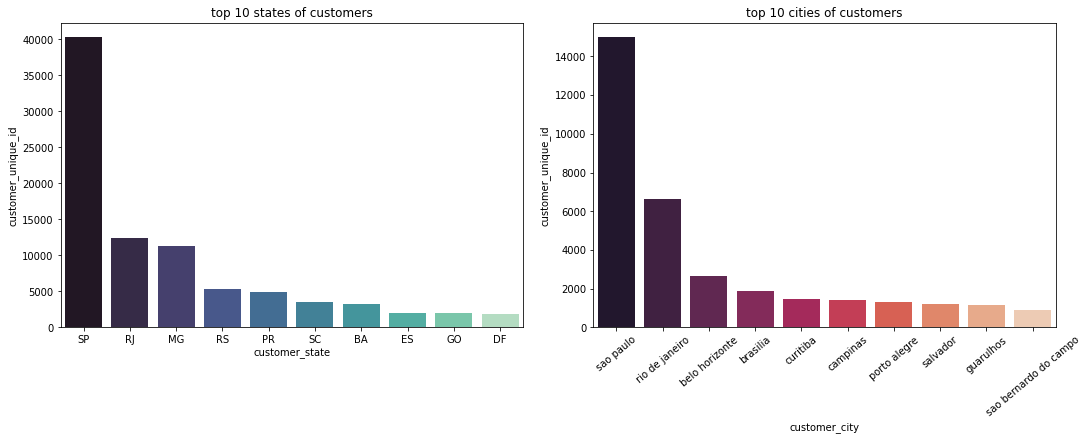

In [6]:
# %%flake8 # PEP8 compliance
# top 10 city and state of customer order count
df_cus_state = df_cus_geo.groupby(
    'customer_state')['customer_unique_id'].nunique().sort_values(
        ascending=False).reset_index()[:10]
df_cus_city = df_cus_geo.groupby(
    'customer_city')['customer_unique_id'].nunique().sort_values(
        ascending=False).reset_index()[:10]
fig = plt.figure(constrained_layout=True, figsize=(15, 6))
gs = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
sns.barplot(
    data=df_cus_state, x='customer_state', y='customer_unique_id',
    palette='mako', ax=ax1)
ax1.set_title('top 10 states of customers')
sns.barplot(
    data=df_cus_city, x='customer_city', y='customer_unique_id',
    palette='rocket', ax=ax2)
ax2.set_title('top 10 cities of customers')
plt.xticks(rotation=40)
plt.show()

conclusion:
The state São Paulo have almost half of customers, we can use it as a feature to describe customer.

In [35]:
# %%flake8 # PEP8 compliance
# create map of orders and unique customers
m = folium.Map([-23.54, -46.64], zoom_start=4, control_scale=True)
folium.raster_layers.TileLayer('Open Street Map').add_to(m)
folium.raster_layers.TileLayer('CartoDB Dark_Matter').add_to(m)

# create a mark cluster of orders
geo_ord = df_cus_geo[['geolocation_lat', 'geolocation_lng']].values.tolist()
FastMarkerCluster(geo_ord, name='orders',).add_to(m)

# create a heatmap of unique customers
gp = df_cus_geo.groupby('customer_unique_id')
geo_cus = gp.mean()[['geolocation_lat', 'geolocation_lng']].values.tolist()
HeatMap(data=geo_cus, name='HeatMapCus', radius=15).add_to(m)

# we found unique customers and orders outside of Brazil.
folium.LayerControl().add_to(m)
m

Output hidden; open in https://colab.research.google.com to view.

## Feature: geolocation
extract geolocation of each unique customer

In [ ]:
# %%flake8 # PEP8 compliance
df_cus_geo.sort_values('customer_unique_id')

,customer_id,customer_unique_id,geolocation_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
17097,fadbb3709178fc513abc1b2670aa1ad2,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,-23.337679,-46.826739
28162,4cb282e167ae9234755102258dd52ee8,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,-23.557876,-46.788754
54273,9b3932a6253894a02c1df9d19004239f,0000f46a3911fa3c0805444483337064,88115,sao jose,SC,-27.543787,-48.631973
96264,914991f0c02ef0843c0e7010c819d642,0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,-1.307764,-48.482884
14703,47227568b10f5f58a524a75507e6992c,0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,-23.506140,-47.470475
...,...,...,...,...,...,...,...
67435,74be082247cd677a147d83ee670e9d53,fffcf5a5ff07b0908bd4e2dbc735a684,55250,sanharo,PE,-8.362125,-36.562773
64560,0ecf8e0a08148af0bf313184f167670a,fffea47cd6d3cc0a88bd621562a9d061,44054,feira de santana,BA,-12.216776,-38.959754
38568,27f584b0f1dc4e610065c240f68b6be0,ffff371b4d645b6ecea244b27531430a,78552,sinop,MT,-11.835954,-55.508033
72839,832a3b0254347d409512ae92eaf154a6,ffff5962728ec6157033ef9805bacc48,29460,bom jesus do norte,ES,-21.126308,-41.674411


In [44]:
# %%flake8 # PEP8 compliance
# we'll extract features of 95828 unique customers: geolocation and 'is in SP'
def isSP(x): return round((x == 'SP').mean())


df_cus_location = df_cus_geo.groupby('customer_unique_id').agg(
    {'geolocation_lat': 'mean',
     'geolocation_lng': 'mean',
     'customer_state': isSP}).reset_index()
df_cus_location.rename({'customer_state': 'isSP'}, axis=1, inplace=True)
df_cus_location.head(3)

,customer_unique_id,geolocation_lat,geolocation_lng,isSP
0,0000366f3b9a7992bf8c76cfdf3221e2,-23.337679,-46.826739,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,-23.557876,-46.788754,1
2,0000f46a3911fa3c0805444483337064,-27.543787,-48.631973,0


In [ ]:
# this variable divides client into 2 groups.
df_cus_location['isSP'].value_counts()

0    55558
1    40270
Name: isSP, dtype: int64

# III. Orders

## Orders amount over time

In [7]:
# %%flake8 # PEP8 compliance
# custom ID, order ID, purchase date, price of 112650 unique items
df1 = dict_df['olist_order_items_dataset'][['order_id',
                                            'order_item_id',
                                            'price']]
df2 = dict_df['olist_orders_dataset'][['order_id',
                                       'customer_id',
                                       'order_purchase_timestamp']]
df_order = df1.merge(df2, on='order_id')
df3 = dict_df['olist_customers_dataset'][['customer_id',
                                          'customer_unique_id']]
df_order = df_order.merge(df3, on='customer_id')
df_order.head(3)

,order_id,order_item_id,price,customer_id,order_purchase_timestamp,customer_unique_id
0,00010242fe8c5a6d1ba2dd792cb16214,1,58.9,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb
1,00018f77f2f0320c557190d7a144bdd3,1,239.9,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051
2,000229ec398224ef6ca0657da4fc703e,1,199.0,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474


In [9]:
# export customer timesstamp for analyse of stability
df_order.to_feather('df_order.ft')

In [8]:
# %%flake8 # PEP8 compliance
# this function helps to get elements from timestamp
def get_date_int(df, column):
    date = df[column].dt.date
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    dayofweek = df[column].dt.dayofweek
    hour = df[column].dt.hour
    return date, year, month, day, dayofweek, hour

In [9]:
# %%flake8 # PEP8 compliance
# add time metrics
df_order['order_purchase_timestamp'] = pd.to_datetime(
    df_order['order_purchase_timestamp'])
date, year, month, _, dayofweek, hour = get_date_int(
    df_order, 'order_purchase_timestamp')
df_order['order_purchase_date'] = date
df_order['order_purchase_year'] = year
df_order['order_purchase_month'] = month
df_order['order_purchase_dayofweek'] = dayofweek
df_order['order_purchase_hour'] = hour

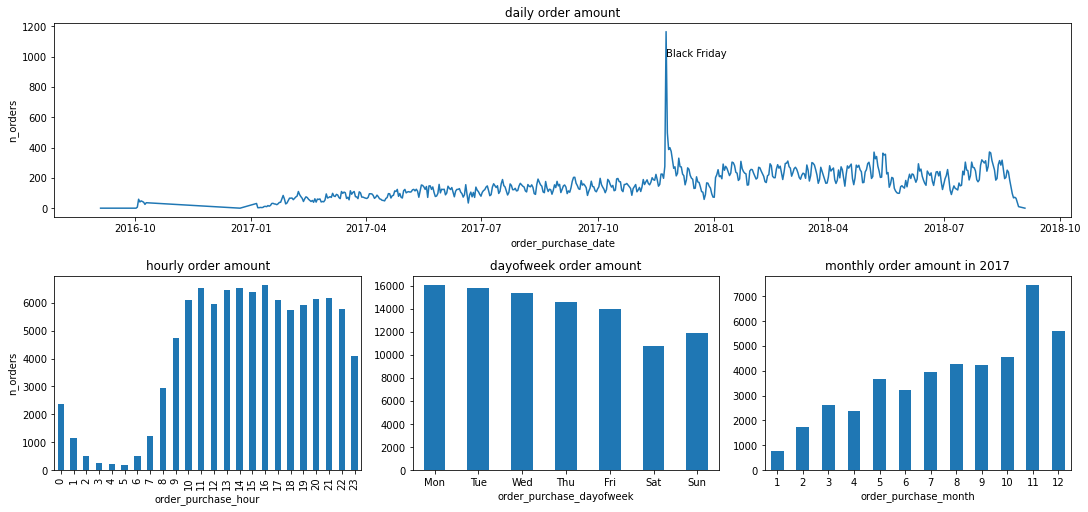

In [11]:
# %%flake8 # PEP8 compliance
# visualization of order amount over time (dayofweek, month, year)
fig = plt.figure(constrained_layout=True, figsize=(15, 7))
gs = fig.add_gridspec(2, 3)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])

df_order.groupby('order_purchase_date')['order_id'].nunique().plot(ax=ax1)
ax1.set_title('daily order amount')
ax1.text('2017-11-24', 1000, 'Black Friday', c='black')
ax1.set_ylabel('n_orders')
df_order.groupby(
    'order_purchase_hour')['order_id'].nunique().plot(kind='bar', ax=ax2)
ax2.set_title('hourly order amount')
ax2.set_ylabel('n_orders')
df_order.groupby(
    'order_purchase_dayofweek')['order_id'].nunique().plot(
        kind='bar', ax=ax3, rot=0)
ax3.set_title('dayofweek order amount')
ax3.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
df_order[df_order['order_purchase_year'] == 2017].groupby(
    'order_purchase_month')['order_id'].nunique().plot(
        kind='bar', ax=ax4, rot=0)
ax4.set_title('monthly order amount in 2017')
plt.show()

Nous constatons que:
1. Globalement, la quantité de commande en ligne augmente au fils du temps. Les relevés des commandes au début et à la fin de toute la période peuvent être incomplets.
2. Le volume des commandes du Black Friday est 6 fois plus élevé que d'habitude.
3. Le meilleur moment de vente dans une journée est 16h, le suivant est 11h.
4. La meilleur période de vente dans une semaine n'est pas le week-end! C'est le lundi.
5. La meilleur période de vente dans une année est Novembre et Décembre.

#IV. RFM Analysis

##Cohort Analyse

In [57]:
# %%flake8 # PEP8 compliance
# month cohort table
df_cohort = df_order.copy()
# record yy.mm of order
def get_month(x): return dt.datetime(x.year, x.month, 1)


df_cohort['order_purchase_yymm'] = df_cohort['order_purchase_timestamp'].apply(
    get_month)
gp = df_cohort.groupby('customer_unique_id')['order_purchase_yymm']
# yymm of 1st order
df_cohort['CohortMonth'] = gp.transform('min')
# difference in months with 1st order
_, y1, m1, _, _, _ = get_date_int(df_cohort, 'order_purchase_yymm')
_, y2, m2, _, _, _ = get_date_int(df_cohort, 'CohortMonth')
df_cohort['CohortIndex'] = (y1 - y2) * 12 + (m1 - m2) + 1

gp = df_cohort.groupby(['CohortMonth', 'CohortIndex'])
cohort_cus = gp['customer_unique_id'].nunique().reset_index()
cohort_cus = cohort_cus.pivot(
    index='CohortMonth', columns='CohortIndex', values='customer_unique_id')

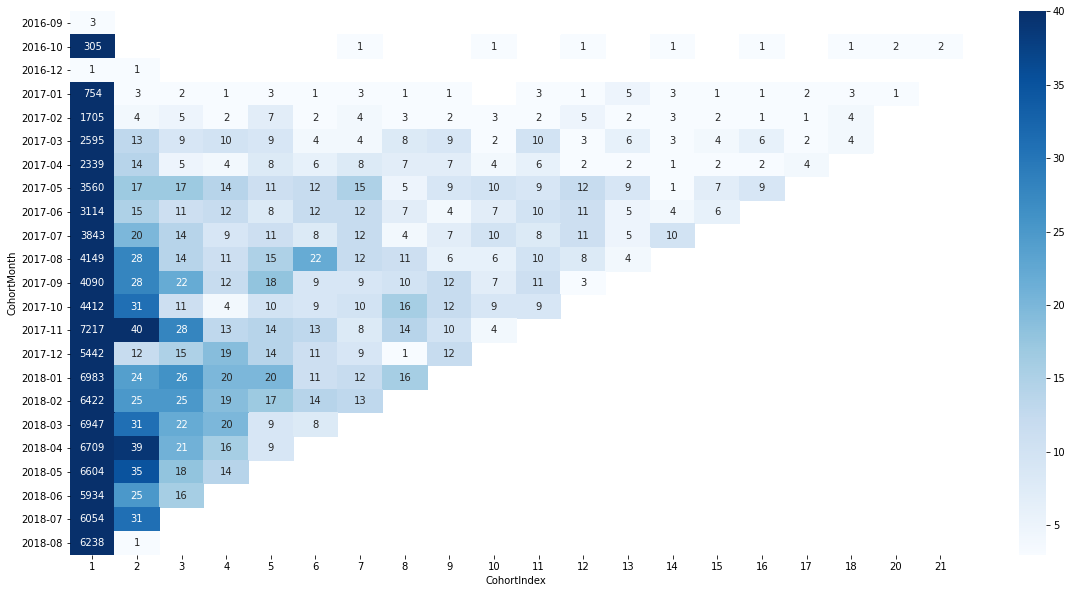

In [60]:
# %%flake8 # PEP8 compliance
# Month Cohort showing number of customers in the same cohort
plt.figure(figsize=(20, 10))
g = sns.heatmap(
    data=cohort_cus, annot=True, fmt='.0f', vmin=3, vmax=40, cmap="Blues")
g.set_yticklabels(cohort_cus.index.strftime('%Y-%m'))
plt.show()

Nous constatons que la rétention de clients reste un niveau bas. Cela peut être dû aux différents systèmes d'enregistrement chez les vendeurs différents. Le système a des difficultés à identifier le même client sur plusieurs plateformes e-commerce. 

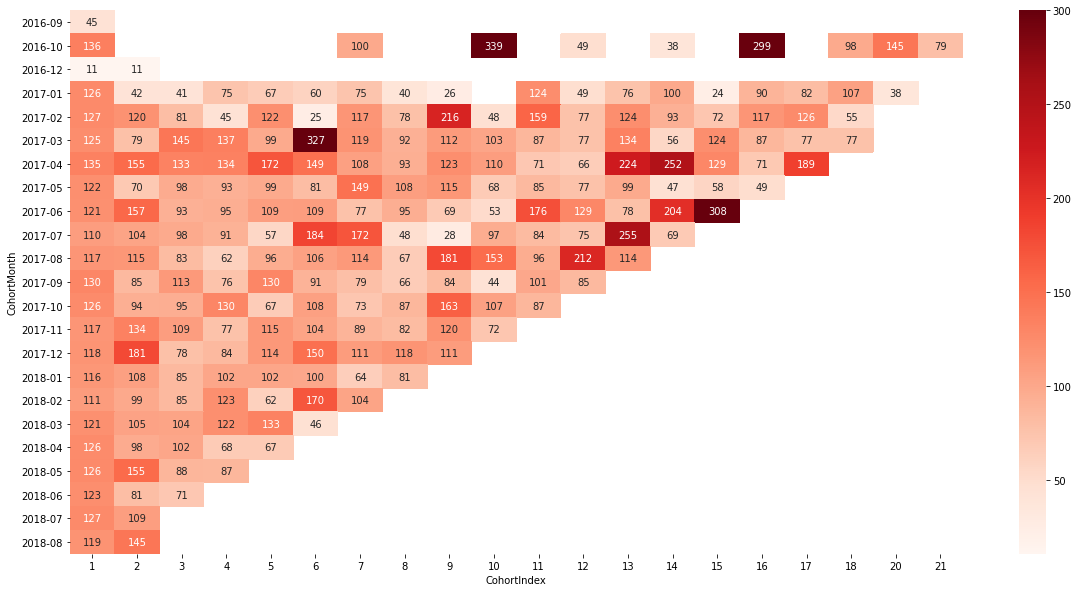

In [63]:
# %%flake8 # PEP8 compliance
# Month Cohort showing shopping patterns (mean consume) of each cohort
cohort_price = gp['price'].mean().reset_index()
cohort_price = cohort_price.pivot(
    index='CohortMonth', columns='CohortIndex', values='price')
plt.figure(figsize=(20, 10))
g = sns.heatmap(
    data=cohort_price, annot=True, fmt='.0f', vmax=300, cmap="Reds")
g.set_yticklabels(cohort_price.index.strftime('%Y-%m'))
plt.show()

Conclusion pour motif d'achat:<br>
Le prix moyen reste en même niveau (environ 120) pour les nouveau clients. Cependant, nous n'arrivons pas à reconnaître les motifs d'achat des clients qui sont restés actifs dans les mois suivants. Cela peut être dû au fait que le nombre de clients restants est trop faible pour que nous puissons trouver un motif d'achat.

##Features : RFM
Calculate Recency, Frequency and Monetary of each unique customer

In [12]:
# %%flake8 # PEP8 compliance
# Aggregate RFM features on a customer level
gp = df_order.groupby('customer_unique_id')
DayOffset = df_order['order_purchase_timestamp'].max() + dt.timedelta(days=1)
df_RFM = gp.agg(
    {'order_purchase_timestamp': lambda x: (DayOffset - x.max()).days,
     'order_id': pd.Series.nunique,
     'price': 'sum'})
# RFM
df_RFM.columns = ['Recency', 'Frequency', 'Monetary']
df_RFM = df_RFM.reset_index()

In [13]:
# %%flake8 # PEP8 compliance
# RFM info of 95420 unique customer
df_cus_RFM = df_RFM
df_cus_RFM.to_feather('df_RFM.ft')
df_cus_RFM.head(3)

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.9
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.9
2,0000f46a3911fa3c0805444483337064,542,1,69.0


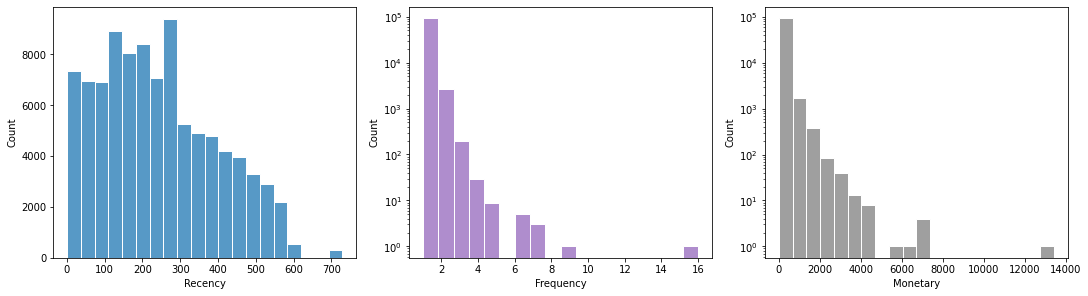

In [70]:
# %%flake8 # PEP8 compliance
# visualization of distribution of RFM
fig = plt.figure(constrained_layout=True, figsize=(15, 4))
gs = fig.add_gridspec(1, 3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

sns.histplot(data=df_RFM, x='Recency', ax=ax1, bins=20, edgecolor='w')
sns.histplot(
    data=df_RFM, x='Frequency', ax=ax2, log_scale=(False, True),
    edgecolor='w', color='tab:purple')
sns.histplot(
    data=df_RFM, x='Monetary', ax=ax3, bins=20, log_scale=(False, True),
    edgecolor='w', color='tab:gray')
plt.show()

Most customers are active in recent one year.<br>
More than 96% of customers have only one purchase record.<br>
More than 95% of customers spend less than 500 in total.<br>
Frequency and Monetary are highly skewed variable, which need to be transformed in latter pre-processing of data.

In [14]:
# %%flake8 # PEP8 compliance
# label the level on RFM: 3 is the best, 1 is the lowest
# 3 recency bins : [1, 154], (154,296], (296, 729]
r_quartile = pd.qcut(df_RFM['Recency'], 3, labels=range(3, 0, -1))
# 3 frequency bins: (0, 1], (1, 3] ,(3, 16]
f_group = pd.cut(
    df_RFM['Frequency'], [0, 1, 3, df_RFM['Frequency'].max()],
    labels=range(1, 4))
# 3 monetary value bins: [8.500e-01, 5.890e+01, 1.289e+02, 1.344e+04]
m_quartile = pd.qcut(df_RFM['Monetary'], 3, labels=range(1, 4))

df_RFM = df_RFM.assign(R=r_quartile, F=f_group, M=m_quartile)

In [15]:
# %%flake8 # PEP8 compliance
# add RFM Type and RFM Score
df_RFM['RFMType'] = df_RFM.apply(
    lambda x: str(x['R']) + str(x['F']) + str(x['M']), axis=1)
df_RFM['RFMScore'] = df_RFM[['R', 'F', 'M']].sum(axis=1)
df_RFM.head(3)

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFMType,RFMScore
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.9,3,1,3,313,7
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.9,3,1,1,311,5
2,0000f46a3911fa3c0805444483337064,542,1,69.0,1,1,2,112,4


In [16]:
# %%flake8 # PEP8 compliance
# rank customers by RFM score. Customers with high score (>7) is less than 800
df_RFM.groupby('RFMScore').agg(
    {'Recency': 'mean', 'Frequency': 'mean', 'Monetary': ['mean', 'count']})

Recency Frequency    Monetary       
                mean      mean        mean  count
RFMScore                                         
3         426.476419  1.000000   34.639372  10432
4         324.089182  1.003593   60.968992  21428
5         241.971465  1.010067  142.670677  30594
6         159.142272  1.042484  187.408490  21255
7          91.573474  1.092767  301.460376  10963
8          82.376912  2.147427  346.277357    719
9          74.827586  5.000000  749.123103     29

In [17]:
# %%flake8 # PEP8 compliance
def rfm_level(df):
    if df['RFMScore'] >= 7:
        return 'Top'
    elif df['RFMScore'] >= 5:
        return 'Middle'
    else:
        return 'Low'


df_RFM['RFMLevel'] = df_RFM.apply(rfm_level, axis=1)
df_RFM.groupby('RFMLevel').agg(
    {'Recency': 'mean', 'Frequency': 'mean',
     'Monetary': ['mean', 'count']}).round(2)

Recency Frequency Monetary       
            mean      mean     mean  count
RFMLevel                                  
Low       357.61      1.00    52.35  31860
Middle    208.02      1.02   161.01  51849
Top        90.97      1.17   305.32  11711

In [18]:
# %%flake8 # PEP8 compliance
def rfm_seg(df):
    if re.match('333', df['RFMType']):
        return 'Best Customers'
    elif re.match('2\w3', df['RFMType']):
        return 'Almost lost big spenders'
    elif re.match('1\w3', df['RFMType']):
        return 'Lost big spenders'
    elif re.match('1\w1', df['RFMType']):
        return 'Lost cheap Customers'
    elif re.match('\w\w3', df['RFMType']):
        return 'Big spenders'
    elif re.match('31\w', df['RFMType']):
        return 'New'
    elif re.match('\w3\w', df['RFMType']):
        return 'Loyal'
    elif re.match('2\w\w', df['RFMType']):
        return 'Almost lost'
    elif re.match('1\w\w', df['RFMType']):
        return 'Lost'
    elif re.match('3\2\w', df['RFMType']):
        return 'Becoming Loyal'
    else:
        return 'Other'


df_RFM['RFMSegment'] = df_RFM.apply(rfm_seg, axis=1)
df_RFM.groupby('RFMSegment').size()

RFMSegment
Almost lost                 21144
Almost lost big spenders    10680
Best Customers                 29
Big spenders                10716
Lost                        10778
Lost big spenders           10372
Lost cheap Customers        10507
Loyal                           1
New                         20867
Other                         326
dtype: int64

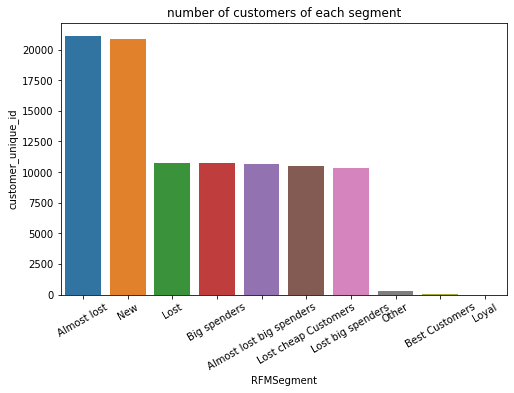

In [19]:
# %%flake8 # PEP8 compliance
dfx = df_RFM.groupby(
    'RFMSegment')['customer_unique_id'].count().sort_values(
        ascending=False).reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=dfx, x='RFMSegment', y='customer_unique_id')
plt.xticks(rotation=30)
plt.title('number of customers of each segment')
plt.show()

# V. Product type

## Orders' product category distribution

In [20]:
# %%flake8 # PEP8 compliance
# 32328 unique product_id with category name
df1 = dict_df['olist_products_dataset'][
                                        ['product_id', 'product_category_name',
                                         'product_weight_g',
                                         'product_length_cm',
                                         'product_height_cm',
                                         'product_width_cm']]
ls = ['product_length_cm', 'product_height_cm', 'product_width_cm']


def volume(df): return df[ls[0]] * df[ls[1]] * df[ls[2]]


df2 = df1.assign(product_vol=df1.apply(volume, axis=1))
df2 = df2.drop(columns=ls)
df3 = dict_df['product_category_name_translation']
df_prod = df2.merge(df3).drop('product_category_name', axis=1)
df_prod.head(3)

,product_id,product_weight_g,product_vol,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,225.0,2240.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,400.0,2700.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,422.0,6048.0,perfumery


In [21]:
# %%flake8 # PEP8 compliance
# 111023 items (in 97256 orders) with product category, weight and volume
df4 = dict_df['olist_order_items_dataset'][[
                                            'product_id', 'order_id',
                                            'order_item_id']]
df_order_prod = df4.merge(df_prod)
df_order_prod.head(3)

,product_id,order_id,order_item_id,product_weight_g,product_vol,product_category_name_english
0,4244733e06e7ecb4970a6e2683c13e61,00010242fe8c5a6d1ba2dd792cb16214,1,650.0,3528.0,cool_stuff
1,4244733e06e7ecb4970a6e2683c13e61,130898c0987d1801452a8ed92a670612,1,650.0,3528.0,cool_stuff
2,4244733e06e7ecb4970a6e2683c13e61,532ed5e14e24ae1f0d735b91524b98b9,1,650.0,3528.0,cool_stuff


In [24]:
df_order_prod.groupby('product_category_name_english').size().sort_values(
        ascending=False).head()

product_category_name_english
bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
dtype: int64

In [28]:
dx.head()

,product_category_name_english,0
0,bed_bath_table,11115
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827


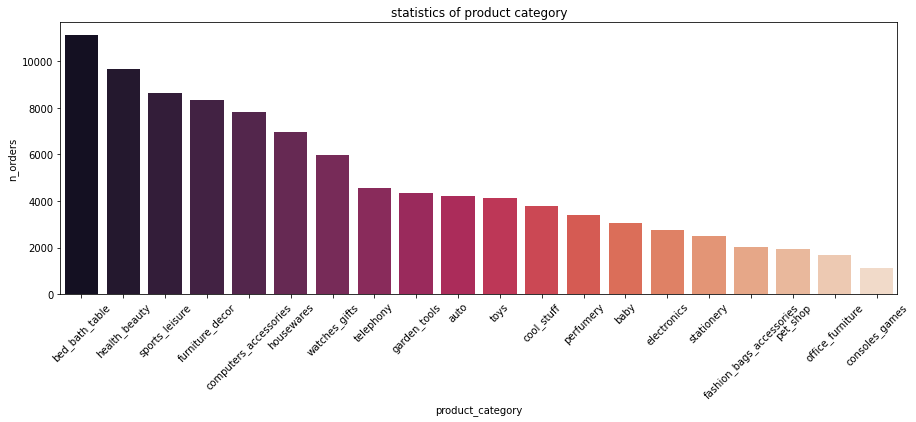

In [36]:
# %%flake8 # PEP8 compliance
# product categories of all orders items
dx = df_order_prod.groupby('product_category_name_english').size().sort_values(
        ascending=False).reset_index()[:20]
dx.columns = ['product_category','n_orders']
plt.figure(figsize=(15, 5))
sns.barplot(data=dx, x='product_category', y='n_orders', palette='rocket')
plt.xticks(rotation=45)
plt.title('statistics of product category')
plt.show()

Products from the "bed_bath_table", "health_beauty" and "sport_leisure" categories appear mostly in the customers' shopping cart.

## Features: Product category
Calculate the number of items in different categories purchased by each unique customer. 

In [96]:
# %%flake8 # PEP8 compliance
# category and customer_unique_id of 111023 items in 97256 orders
df1 = df_order[['order_id', 'customer_unique_id']].drop_duplicates()
# merge based on order_id
df2 = df1.merge(df_order_prod)
df2['order_item_number'] = 1
df2.head(3)

,order_id,customer_unique_id,product_id,order_item_id,product_weight_g,product_vol,product_category_name_english,order_item_number
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,4244733e06e7ecb4970a6e2683c13e61,1,650.0,3528.0,cool_stuff,1
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,e5f2d52b802189ee658865ca93d83a8f,1,30000.0,60000.0,pet_shop,1
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,c777355d18b72b67abbeef9df44fd0fd,1,3050.0,14157.0,furniture_decor,1


In [99]:
# %%flake8 # PEP8 compliance
# mean product weight and volume purchased by 94088 unique customer
df_cus_prod = df2.groupby(
    'customer_unique_id')[[
                           'product_weight_g',
                           'product_vol']].mean().reset_index()
df_cus_prod.head(3)

,customer_unique_id,product_weight_g,product_vol
0,0000366f3b9a7992bf8c76cfdf3221e2,1500.0,7616.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,375.0,5148.0
2,0000f46a3911fa3c0805444483337064,1500.0,43750.0


In [103]:
# %%flake8 # PEP8 compliance
# prod info of 94088 unique customers : quantity and category of items
df3 = pd.get_dummies(df2['product_category_name_english'], drop_first=True)
df4 = pd.concat(
    [df2[['customer_unique_id', 'order_item_number']], df3], axis=1)
df5 = df4.groupby('customer_unique_id').sum().reset_index()
df_cus_prodEncode = df_cus_prod.merge(df5)
df_cus_prodEncode.sort_values('order_item_number', ascending=False).head(3)

,customer_unique_id,product_weight_g,product_vol,order_item_number,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,cds_dvds_musicals,christmas_supplies,cine_photo,computers,computers_accessories,consoles_games,construction_tools_construction,construction_tools_lights,construction_tools_safety,cool_stuff,costruction_tools_garden,costruction_tools_tools,diapers_and_hygiene,drinks,dvds_blu_ray,electronics,fashio_female_clothing,fashion_bags_accessories,fashion_childrens_clothes,fashion_male_clothing,fashion_shoes,fashion_sport,fashion_underwear_beach,fixed_telephony,flowers,food,food_drink,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,perfumery,pet_shop,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
73731,c8460e4251689ba205045f3ea17884a1,700.00000,10080.000000,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0
25523,4546caea018ad8c692964e3382debd19,809.52381,1285.714286,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38896,698e1cf81d01a3d389d96145f7fa6df8,1400.00000,18600.000000,20,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# %%flake8 # PEP8 compliance
df_cus_prodEncode.iloc[:,4:].mean().sort_values()

security_and_services        0.000021
fashion_childrens_clothes    0.000085
la_cuisine                   0.000149
cds_dvds_musicals            0.000149
arts_and_craftmanship        0.000255
                               ...   
computers_accessories        0.083188
furniture_decor              0.088577
sports_leisure               0.091840
health_beauty                0.102776
bed_bath_table               0.118134
Length: 70, dtype: float64

# VI Sellers

## Sellers condition

In [37]:
# %%flake8 # PEP8 compliance
# geolocation of 3088 unique sellers
df_seller = dict_df['olist_sellers_dataset']
df_seller.rename(
    columns={'seller_zip_code_prefix': 'geolocation_zip_code_prefix'},
    inplace=True)
df_seller_geo = df_seller.merge(df_geo)
df_seller_geo.rename(
    columns={'geolocation_lat': 'seller_geolocation_lat',
             'geolocation_lng': 'seller_geolocation_lng'},
    inplace=True)
df_seller_geo.head(3)

,seller_id,geolocation_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.894561,-47.062380
1,e0eabded302882513ced4ea3eb0c7059,13023,campinas,SP,-22.894561,-47.062380
2,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,-22.382440,-46.947605


In [38]:
# %%flake8 # PEP8 compliance
# 112397 order items associated with their seller
df1 = df_order[['order_id',	'order_item_id', 'customer_unique_id']]
df2 = dict_df['olist_order_items_dataset'][[
                                            'order_id', 'order_item_id',
                                            'seller_id']]
df3 = df1.merge(df2, on=['order_id',	'order_item_id'])
df_cus_seller = df3.merge(df_seller_geo)
df_cus_seller.head(3)

,order_id,order_item_id,customer_unique_id,seller_id,geolocation_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,1,871766c5855e863f6eccc05f988b23cb,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP,-22.498419,-44.125272
1,0188777fe321843a18be24a6e9aa1e53,1,f81c042ed0162a51b90372c233b4fbad,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP,-22.498419,-44.125272
2,0191bbb5166d4b9a68df11797d5acfa9,1,921fa6982e780da7d9e0bb6ca11b380c,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP,-22.498419,-44.125272


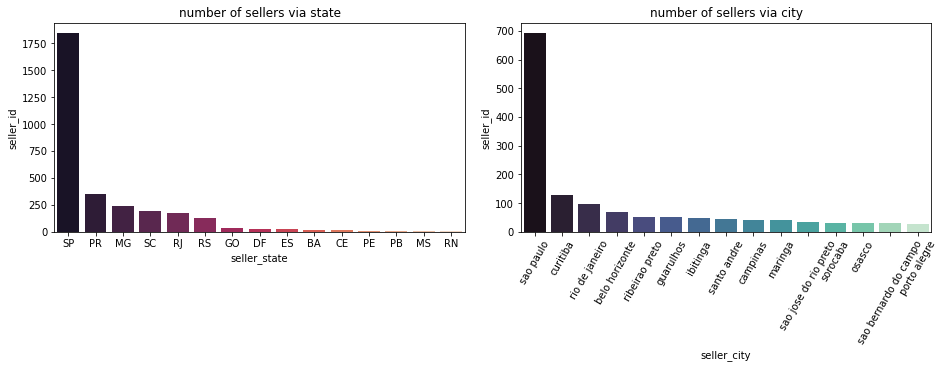

In [44]:
# %%flake8 # PEP8 compliance
# top 20 sellers of unique customer quantities
df_seller_state = df_seller.groupby(
    'seller_state')['seller_id'].count().sort_values(
        ascending=False).reset_index()[:15]
df_seller_city = df_seller.groupby(
    'seller_city')['seller_id'].count().sort_values(
        ascending=False).reset_index()[:15]

fig = plt.figure(figsize=(13, 5), constrained_layout=True)
gs = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

sns.barplot(
    data=df_seller_state, x='seller_state', y='seller_id',
    ax=ax1, palette='rocket')
ax1.set_title('number of sellers via state')
sns.barplot(data=df_seller_city, x='seller_city', y='seller_id',
            ax=ax2, palette='mako')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=60)
ax2.set_title('number of sellers via city')
plt.show()

1st rank seller have more than 1750 unique customers. Most seller are located in Sāo Paulo

##Feature: Seller
We decide not to add features about seller, since: <br>
1. we've already have product catgory features to describe shopping pattern
2. there are 3088 unique sellers which will bring 3088 variables during one-hot encoding.
3. More than 96% customers are only associated with one single seller. 

In [117]:
# %%flake8 # PEP8 compliance
# number of client who are associated with 1 seller, 2 sellers...10 sellers
df_cus_seller.groupby(
    'customer_unique_id')['seller_id'].nunique().sort_values(
    ).reset_index()['seller_id'].value_counts()

1     91963
2      2976
3       224
4        38
5         9
6         5
10        1
8         1
Name: seller_id, dtype: int64

In [ ]:
# %%flake8 # PEP8 compliance
# we have 3088 unique sellers
df_cus_seller.nunique()

order_id                       98450
order_item_id                     21
customer_unique_id             95217
seller_id                       3088
geolocation_zip_code_prefix     2239
seller_city                      611
seller_state                      23
seller_geolocation_lat          2239
seller_geolocation_lng          2239
dtype: int64

# VII Review

In [45]:
# %%flake8 # PEP8 compliance
df_review = dict_df['olist_order_reviews_dataset']
df_review.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [46]:
# %%flake8 # PEP8 compliance
# mean review score given by 95420 unique customer
df1 = df_order[['order_id', 'customer_unique_id']].drop_duplicates()
df2 = df_review[['review_id', 'order_id', 'review_score']].merge(df1)
df_cus_review = df2.groupby(
    'customer_unique_id')['review_score'].mean().reset_index()

Text(0, 0.5, 'count')

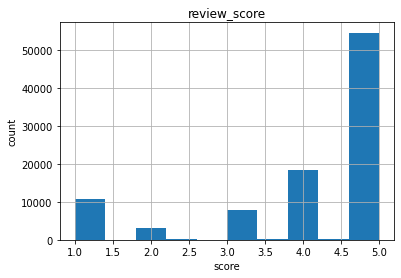

In [47]:
df_cus_review.hist()
plt.xlabel('score')
plt.ylabel('count')

# VIII Payment

In [48]:
# %%flake8 # PEP8 compliance
df_pay = dict_df['olist_order_payments_dataset']
df_pay.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


Text(0, 0.5, 'count')

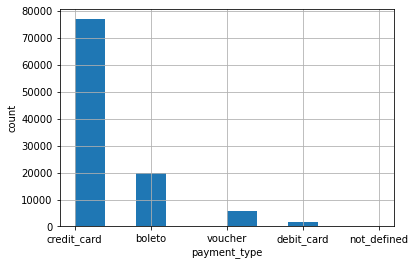

In [49]:
# most order use credit card, we can use this as a customer feature
df_pay['payment_type'].hist()
plt.xlabel('payment_type')
plt.ylabel('count')

In [125]:
# %%flake8 # PEP8 compliance
# add customer unique id to payment dataset
df1 = df_order[['customer_unique_id', 'order_id']].drop_duplicates()
df2 = df1.merge(df_pay)
df3 = pd.get_dummies(df2['payment_type'], drop_first=True)
df_payEncode = pd.concat([df2, df3], axis=1).drop(columns='payment_type')
df_payEncode.head(3)

,customer_unique_id,order_id,payment_sequential,payment_installments,payment_value,credit_card,debit_card,voucher
0,871766c5855e863f6eccc05f988b23cb,00010242fe8c5a6d1ba2dd792cb16214,1,2,72.19,1,0,0
1,eb28e67c4c0b83846050ddfb8a35d051,00018f77f2f0320c557190d7a144bdd3,1,3,259.83,1,0,0
2,3818d81c6709e39d06b2738a8d3a2474,000229ec398224ef6ca0657da4fc703e,1,5,216.87,1,0,0


In [131]:
# %%flake8 # PEP8 compliance
# calculate payment value percentage by each payment type
# payment value = freight + price, so we encode freight in variable xxx_pct
gp = df_payEncode.groupby('customer_unique_id')['payment_value']
df_payEncode['TotalPayment'] = gp.transform('sum')
p = df_payEncode['payment_value']
t = df_payEncode['TotalPayment']
for i in ['credit_card', 'debit_card', 'voucher']:
    df_payEncode[i + '_pct'] = p * df_payEncode[i] / t
df_payEncode.head(3)

,customer_unique_id,order_id,payment_sequential,payment_installments,payment_value,credit_card,debit_card,voucher,TotalPayment,credit_card_pct,debit_card_pct,voucher_pct
0,871766c5855e863f6eccc05f988b23cb,00010242fe8c5a6d1ba2dd792cb16214,1,2,72.19,1,0,0,72.19,1.000000,0.0,0.0
1,eb28e67c4c0b83846050ddfb8a35d051,00018f77f2f0320c557190d7a144bdd3,1,3,259.83,1,0,0,284.56,0.913094,0.0,0.0
2,3818d81c6709e39d06b2738a8d3a2474,000229ec398224ef6ca0657da4fc703e,1,5,216.87,1,0,0,216.87,1.000000,0.0,0.0


In [134]:
# %%flake8 # PEP8 compliance
# payment features of 95419 unique customers
gp = df_payEncode.groupby('customer_unique_id')
df_cus_pay = gp.agg(
    {'payment_installments': 'mean',
     'credit_card_pct': 'sum',
     'debit_card_pct': 'sum',
     'voucher_pct': 'sum'}).reset_index()
df_cus_pay.head(3)

,customer_unique_id,payment_installments,credit_card_pct,debit_card_pct,voucher_pct
0,0000366f3b9a7992bf8c76cfdf3221e2,8.0,1.0,0.0,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,1.0,0.0,0.0
2,0000f46a3911fa3c0805444483337064,8.0,1.0,0.0,0.0


#IX Preprocession of data

## Aggregation of features
Aggregate features by customer_unique_id

In [136]:
# %%flake8 # PEP8 compliance
# merge features of 93828 unique customers
df_ls = [
         df_cus_location, df_cus_RFM, df_cus_review, df_cus_pay,
         df_cus_prodEncode]
data_cus = df_ls[0]
for df_ in df_ls[1:]:
    data_cus = data_cus.merge(df_, on='customer_unique_id')
data_cus = data_cus.dropna().reset_index().drop(columns='index')
data_cus.head(3)

,customer_unique_id,geolocation_lat,geolocation_lng,isSP,Recency,Frequency,Monetary,review_score,payment_installments,credit_card_pct,debit_card_pct,voucher_pct,product_weight_g,product_vol,order_item_number,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,cds_dvds_musicals,christmas_supplies,cine_photo,computers,computers_accessories,consoles_games,construction_tools_construction,construction_tools_lights,construction_tools_safety,cool_stuff,costruction_tools_garden,costruction_tools_tools,diapers_and_hygiene,drinks,dvds_blu_ray,electronics,fashio_female_clothing,fashion_bags_accessories,fashion_childrens_clothes,fashion_male_clothing,fashion_shoes,fashion_sport,fashion_underwear_beach,fixed_telephony,flowers,food,food_drink,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,perfumery,pet_shop,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
0,0000366f3b9a7992bf8c76cfdf3221e2,-23.337679,-46.826739,1,116,1,129.9,5.0,8.0,1.0,0.0,0.0,1500.0,7616.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,-23.557876,-46.788754,1,119,1,18.9,4.0,1.0,1.0,0.0,0.0,375.0,5148.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0000f46a3911fa3c0805444483337064,-27.543787,-48.631973,0,542,1,69.0,3.0,8.0,1.0,0.0,0.0,1500.0,43750.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# save data_cus 
data_cus.to_feather('data_cus.ft')

In [138]:
# %%flake8 # PEP8 compliance
# save RFM labels for comparing with other clustering labels
RFM_label = df_RFM[['customer_unique_id', 'RFMSegment', 'RFMLevel']]
data_label = data_cus.merge(
    RFM_label, how='left')[['customer_unique_id', 'RFMSegment', 'RFMLevel']]
data_label.to_feather('data_RFMLabel.ft')

##Feature engineering

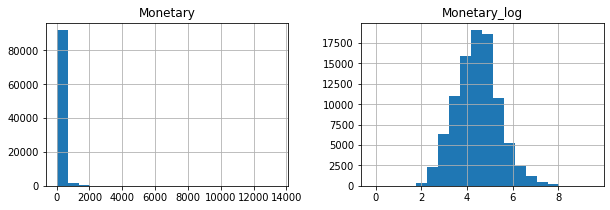

In [142]:
# %%flake8 # PEP8 compliance
# feature engineering: price
data_cus.insert(7, 'Monetary_log', np.log(data_cus['Monetary']))
data_cus[['Monetary', 'Monetary_log']].hist(bins=20, figsize=(10, 3))
plt.show()

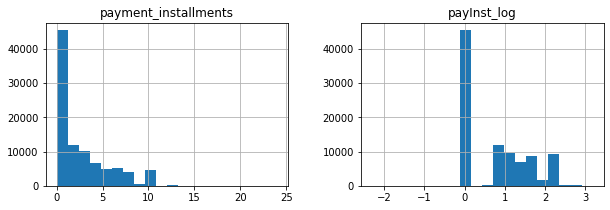

In [144]:
# %%flake8 # PEP8 compliance
# feature engineering: payment installment
data_cus.insert(
    10, 'payInst_log', np.log(data_cus['payment_installments'] + 0.1))
data_cus[['payment_installments', 'payInst_log']].hist(
    bins=20, figsize=(10, 3))
plt.show()

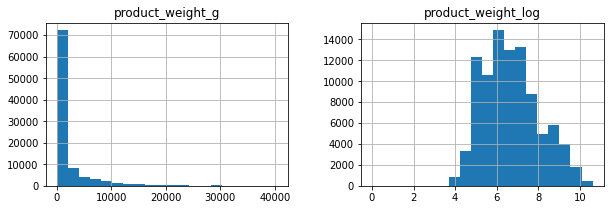

In [146]:
# %%flake8 # PEP8 compliance
# feature engineering: weight
data_cus.insert(
    15, 'product_weight_log', np.log(data_cus['product_weight_g'] + 1))
data_cus[['product_weight_g', 'product_weight_log']].hist(
    bins=20, figsize=(10, 3))
plt.show()

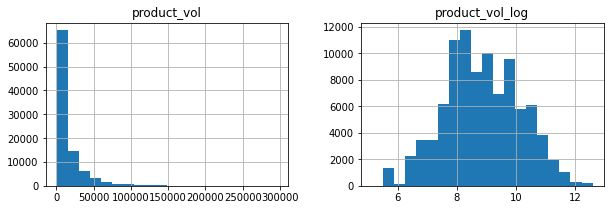

In [148]:
# %%flake8 # PEP8 compliance
# feature engineering: volume
data_cus.insert(17, 'product_vol_log', np.log(data_cus['product_vol']))
data_cus[['product_vol', 'product_vol_log']].hist(bins=20, figsize=(10, 3))
plt.show()

In [ ]:
data_cus.head()

,customer_unique_id,geolocation_lat,geolocation_lng,isSP,Recency,Frequency,Monetary,Monetary_log,review_score,payment_installments,payInst_log,credit_card_pct,debit_card_pct,voucher_pct,product_weight_g,product_weight_log,product_vol,product_vol_log,order_item_number,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,cds_dvds_musicals,christmas_supplies,cine_photo,computers,computers_accessories,consoles_games,construction_tools_construction,construction_tools_lights,construction_tools_safety,cool_stuff,costruction_tools_garden,costruction_tools_tools,diapers_and_hygiene,drinks,dvds_blu_ray,electronics,fashio_female_clothing,fashion_bags_accessories,fashion_childrens_clothes,fashion_male_clothing,fashion_shoes,fashion_sport,fashion_underwear_beach,fixed_telephony,flowers,food,food_drink,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,perfumery,pet_shop,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
0,0000366f3b9a7992bf8c76cfdf3221e2,-23.337679,-46.826739,1,116,1,129.90,4.866765,5.0,8.0,2.091864,1.0,0.0,0.0,1500.0,7.313887,7616.0,8.938007,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,-23.557876,-46.788754,1,119,1,18.90,2.939162,4.0,1.0,0.095310,1.0,0.0,0.0,375.0,5.929589,5148.0,8.546364,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0000f46a3911fa3c0805444483337064,-27.543787,-48.631973,0,542,1,69.00,4.234107,3.0,8.0,2.091864,1.0,0.0,0.0,1500.0,7.313887,43750.0,10.686247,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0000f6ccb0745a6a4b88665a16c9f078,-1.307764,-48.482884,0,326,1,25.99,3.257712,4.0,4.0,1.410987,1.0,0.0,0.0,150.0,5.017280,1045.0,6.951772,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0004aac84e0df4da2b147fca70cf8255,-23.506140,-47.470475,1,293,1,180.00,5.192957,5.0,6.0,1.808289,1.0,0.0,0.0,6050.0,8.707979,528.0,6.269096,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [153]:
# %%flake8 # PEP8 compliance
data_cus_log = data_cus.drop(columns=[
                       'Monetary',           # encoded in 'xxx_log'
                       'payment_installments',
                       'product_weight_g',
                       'product_vol',
                       'isSP',               # encoded in 'geolocation'
                       'Frequency',          # corrlated with order_item_number
                       'customer_unique_id'  # inexplicable variable
                       ])
data_cus_log.head(3)

,geolocation_lat,geolocation_lng,Recency,Monetary_log,review_score,payInst_log,credit_card_pct,debit_card_pct,voucher_pct,product_weight_log,product_vol_log,order_item_number,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,cds_dvds_musicals,christmas_supplies,cine_photo,computers,computers_accessories,consoles_games,construction_tools_construction,construction_tools_lights,construction_tools_safety,cool_stuff,costruction_tools_garden,costruction_tools_tools,diapers_and_hygiene,drinks,dvds_blu_ray,electronics,fashio_female_clothing,fashion_bags_accessories,fashion_childrens_clothes,fashion_male_clothing,fashion_shoes,fashion_sport,fashion_underwear_beach,fixed_telephony,flowers,food,food_drink,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,perfumery,pet_shop,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
0,-23.337679,-46.826739,116,4.866765,5.0,2.091864,1.0,0.0,0.0,7.313887,8.938007,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-23.557876,-46.788754,119,2.939162,4.0,0.095310,1.0,0.0,0.0,5.929589,8.546364,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-27.543787,-48.631973,542,4.234107,3.0,2.091864,1.0,0.0,0.0,7.313887,10.686247,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## PCA

In [156]:
# %%flake8 # PEP8 compliance
# standardization
scaler = StandardScaler()
data_cus_std = data_cus_log.copy()
data_cus_std.iloc[:, :] = scaler.fit_transform(data_cus_log)
pca = PCA()
pca.fit(data_cus_std)
ratio = pca.explained_variance_ratio_
print(ratio)

[3.28825063e-02 2.09295385e-02 1.80714747e-02 1.77950757e-02
 1.48966329e-02 1.41935582e-02 1.33570364e-02 1.31534967e-02
 1.30196147e-02 1.29939188e-02 1.28223195e-02 1.27622120e-02
 1.27028771e-02 1.26661841e-02 1.26426563e-02 1.25749618e-02
 1.25720606e-02 1.25602540e-02 1.25426863e-02 1.25045866e-02
 1.24751681e-02 1.24514082e-02 1.24164138e-02 1.24112843e-02
 1.24049638e-02 1.23849624e-02 1.23610350e-02 1.23354101e-02
 1.23182654e-02 1.23108834e-02 1.23042349e-02 1.23003531e-02
 1.22935494e-02 1.22812856e-02 1.22809236e-02 1.22585636e-02
 1.22464253e-02 1.22354030e-02 1.22312479e-02 1.22270782e-02
 1.22200442e-02 1.22177596e-02 1.22154307e-02 1.22111059e-02
 1.22082350e-02 1.22057734e-02 1.22055779e-02 1.22021203e-02
 1.22008031e-02 1.21987259e-02 1.21971944e-02 1.21966206e-02
 1.21946945e-02 1.21927392e-02 1.21909443e-02 1.21868947e-02
 1.21811834e-02 1.21735322e-02 1.21650661e-02 1.21603596e-02
 1.21541402e-02 1.21487190e-02 1.21421222e-02 1.21173890e-02
 1.20915659e-02 1.208469

In [160]:
# %%flake8 # PEP8 compliance
def pca_ScreePlot(ratio, i=90):
    plt.bar(np.arange(len(ratio)) + 1, ratio * 100)
    plt.plot(np.arange(len(ratio)) + 1, ratio.cumsum() * 100, 'r-o')
    plt.plot((1, len(ratio) + 1), (i, i), 'r--')
    plt.grid()
    plt.title('Scree Plot')
    plt.xlabel('Number of principal components')
    plt.ylabel('Percentage explained variance')

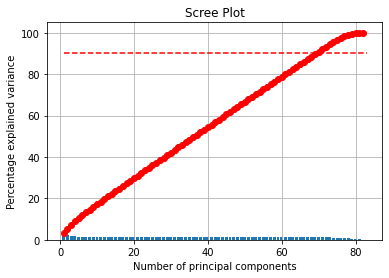

In [ ]:
# chaque variable tient une importance similaire
pca_ScreePlot(ratio)

In [163]:
# %%flake8 # PEP8 compliance
# We'll drop some variables since all components show similar importance
# drop all product category features
feature_cat = df_cus_prodEncode.columns.tolist()[4:]
# drop the minority payment type features
feature_pay = ['debit_card_pct', 'voucher_pct']
feature_drop = feature_cat + feature_pay
len(feature_drop)

72

In [ ]:
feature_drop

['air_conditioning',
 'art',
 'arts_and_craftmanship',
 'audio',
 'auto',
 'baby',
 'bed_bath_table',
 'books_general_interest',
 'books_imported',
 'books_technical',
 'cds_dvds_musicals',
 'christmas_supplies',
 'cine_photo',
 'computers',
 'computers_accessories',
 'consoles_games',
 'construction_tools_construction',
 'construction_tools_lights',
 'construction_tools_safety',
 'cool_stuff',
 'costruction_tools_garden',
 'costruction_tools_tools',
 'diapers_and_hygiene',
 'drinks',
 'dvds_blu_ray',
 'electronics',
 'fashio_female_clothing',
 'fashion_bags_accessories',
 'fashion_childrens_clothes',
 'fashion_male_clothing',
 'fashion_shoes',
 'fashion_sport',
 'fashion_underwear_beach',
 'fixed_telephony',
 'flowers',
 'food',
 'food_drink',
 'furniture_bedroom',
 'furniture_decor',
 'furniture_living_room',
 'furniture_mattress_and_upholstery',
 'garden_tools',
 'health_beauty',
 'home_appliances',
 'home_appliances_2',
 'home_comfort_2',
 'home_confort',
 'home_construction',
 'ho

In [166]:
# %%flake8 # PEP8 compliance
# dataset simplified
data_cus_noncat = data_cus_log.drop(columns=feature_drop)
data_cus_noncat_std = data_cus_noncat.copy()
data_cus_noncat_std.iloc[:, :] = scaler.fit_transform(data_cus_noncat)
pca = PCA()
pca.fit(data_cus_noncat_std)
ratio_noncat = pca.explained_variance_ratio_
print(data_cus_noncat.columns)
print(ratio_noncat)

Index(['geolocation_lat', 'geolocation_lng', 'Recency', 'Monetary_log',
       'review_score', 'payInst_log', 'credit_card_pct', 'product_weight_log',
       'product_vol_log', 'order_item_number'],
      dtype='object')
[0.23713401 0.15094032 0.13269175 0.11238497 0.10064251 0.09130302
 0.06151956 0.052941   0.03844664 0.02199621]


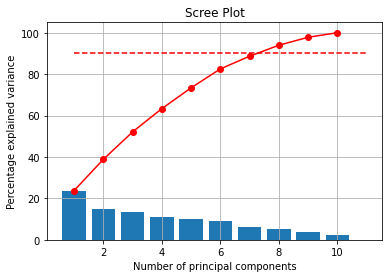

In [ ]:
pca_ScreePlot(ratio_noncat)

In [ ]:
ratio_noncat.cumsum()

array([0.23713401, 0.38807433, 0.52076608, 0.63315105, 0.73379357,
       0.82509659, 0.88661614, 0.93955715, 0.97800379, 1.        ])

From the scree plot, the first 8 principal components explain >90% of the variance of the data set.

In [168]:
# %%flake8 # PEP8 compliance
# extract 8 principal components
pca = PCA(n_components=8)
pc = pca.fit_transform(data_cus_noncat_std)
col = ['PC' + str(i) for i in np.arange(8) + 1]
data_pc8 = pd.DataFrame(pc, columns=col)
data_pc8.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.131651,0.100534,-1.347477,-0.588817,-0.867229,0.068968,-0.379008,-0.325983
1,-1.559984,-0.245792,-0.431725,-0.298908,-0.508429,-0.786546,1.149171,0.402388
2,1.655329,-0.724431,-1.013903,-0.396306,2.332874,-0.560491,0.407678,-0.215207


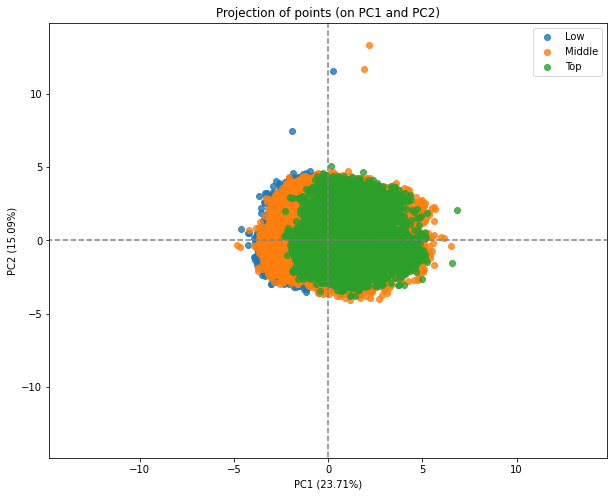

In [169]:
fc.display_factorial_planes(pc, pca, [(0,1)], illustrative_var=data_label['RFMLevel'].tolist()) 

In [ ]:
data_pc8.to_feather('data_pc8.ft')
data_cus_noncat_std.to_feather('data_noncat_std.ft')
data_cus_std.to_feather('data_std.ft')

#Brouillon

Text(0, 0.5, 'PC2 14.94%')

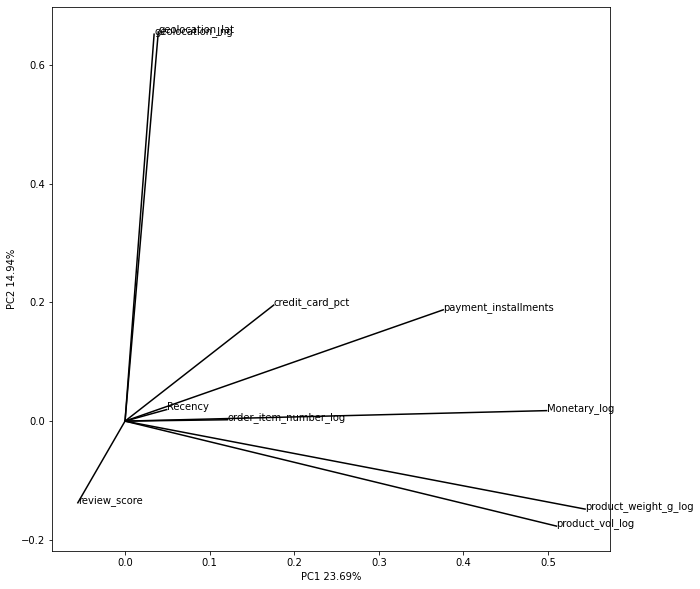

In [ ]:
pcs=pca.components_
plt.figure(figsize=(10,10))
#plt.scatter(data_pc['PC1'],data_pc['PC2'])
for i, (x,y) in enumerate(zip(pcs[0,:],pcs[1,:])):
  plt.plot([0,x],[0,y],color='k')
  plt.text(x,y,data_cus_noncat_std.columns[i])

plt.xlabel('PC1 {:.2%}'.format(ratio_noncat[0]))
plt.ylabel('PC2 {:.2%}'.format(ratio_noncat[1]))

In [ ]:
(data_cus_noncat['credit_card_pct']!=0).sum()

72395

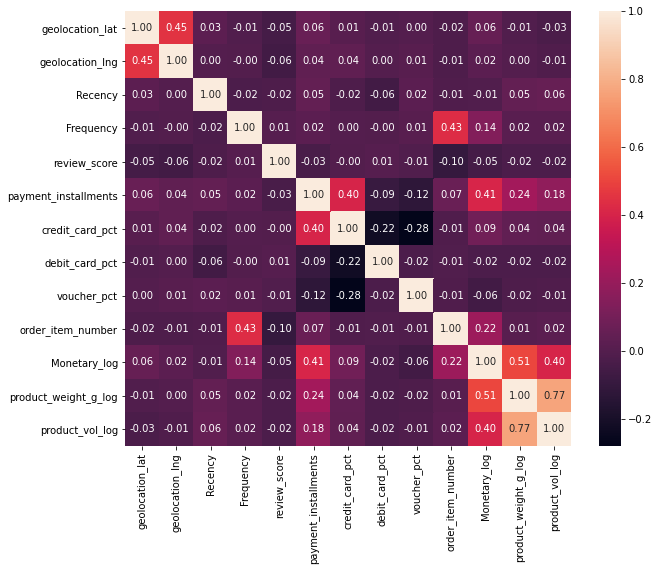

In [ ]:
plt.figure(figsize=(10,8))
corr=data_cus_noncat.corr()
sns.heatmap(corr,annot=True, fmt='.2f')

In [ ]:
sns.pairplot(data_cus_noncat)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
dup_rev=dict_df['olist_order_reviews_dataset'][dict_df['olist_order_reviews_dataset'][['review_id']].duplicated(keep=False)].sort_values('review_id')

In [ ]:
dup_rev

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
47045,00130cbe1f9d422698c812ed8ded1919,dfcdfc43867d1c1381bfaf62d6b9c195,1,NaN,"O cartucho ""original HP"" 60XL não é reconhecid...",2018-03-07 00:00:00,2018-03-20 18:08:23
30062,00130cbe1f9d422698c812ed8ded1919,04a28263e085d399c97ae49e0b477efa,1,NaN,"O cartucho ""original HP"" 60XL não é reconhecid...",2018-03-07 00:00:00,2018-03-20 18:08:23
63695,0115633a9c298b6a98bcbe4eee75345f,0c9850b2c179c1ef60d2855e2751d1fa,5,NaN,NaN,2017-09-21 00:00:00,2017-09-26 03:27:47
91399,0115633a9c298b6a98bcbe4eee75345f,78a4201f58af3463bdab842eea4bc801,5,NaN,NaN,2017-09-21 00:00:00,2017-09-26 03:27:47
57727,0174caf0ee5964646040cd94e15ac95e,74db91e33b4e1fd865356c89a61abf1f,1,NaN,Produto entregue dentro de embalagem do fornec...,2018-03-07 00:00:00,2018-03-08 03:00:53
...,...,...,...,...,...,...,...
40677,fe5c833752953fed3209646f1f63b53c,d3775e436e60258e62e678a0f68a0f8d,1,NaN,"Comprei dois produtos e ambos, mesmo enviados ...",2018-02-28 00:00:00,2018-02-28 13:57:52
7924,ff2fc9e68f8aabfbe18d710b83aabd30,2da58e0a7dcfa4ce1e00fad9d03ca3b5,2,NaN,NaN,2018-03-17 00:00:00,2018-03-19 11:44:15
83183,ff2fc9e68f8aabfbe18d710b83aabd30,1078d496cc6ab9a8e6f2be77abf5091b,2,NaN,NaN,2018-03-17 00:00:00,2018-03-19 11:44:15
1997,ffb8cff872a625632ac983eb1f88843c,c88b1d1b157a9999ce368f218a407141,3,NaN,NaN,2017-07-22 00:00:00,2017-07-26 13:41:07


In [ ]:
dup_rev['order_id'].nunique()

1436

In [ ]:
dup_rev[['order_id']].merge(dict_df['olist_order_items_dataset'],how='left').sort_values('order_id')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
297,0035246a40f520710769010f752e7507,1.0,8a6187b2665118d5095f99a25fd7ba7a,4a3ca9315b744ce9f8e9374361493884,2017-08-23 01:25:39,87.00,12.11
28,0068c109948b9a1dfb8530d1978acef3,2.0,525f8fbde09c9bf777025c3141fbbc6e,8b321bb669392f5163d04c59e235e066,2018-01-30 02:53:04,35.90,15.79
27,0068c109948b9a1dfb8530d1978acef3,1.0,525f8fbde09c9bf777025c3141fbbc6e,8b321bb669392f5163d04c59e235e066,2018-01-30 02:53:04,35.90,15.79
1235,00a250dbdb3153cc6ecf4d3f07ef6a17,1.0,ee0c1cf2fbeae95205b4aa506f1469f0,cc419e0650a3c5ba77189a1882b7556a,2017-12-15 18:15:33,53.99,7.78
155,00d94e8901b75ee0d6ef1f87f947b666,1.0,a35a9f46dcee0a67c8c7ad8493eb4135,85d9eb9ddc5d00ca9336a2219c97bb13,2017-05-08 14:25:13,27.90,20.80
...,...,...,...,...,...,...,...
170,ff536d93ae4214b4d51c2894ccfc569f,1.0,53d2c16e7356d124bb2a3f64ca920754,4e922959ae960d389249c378d1c939f5,2017-12-29 12:32:10,39.00,8.27
1484,ff763b73e473d03c321bcd5a053316e8,1.0,7c1bd920dbdf22470b68bde975dd3ccf,cc419e0650a3c5ba77189a1882b7556a,2017-10-27 16:14:13,58.99,16.66
664,ff763b73e473d03c321bcd5a053316e8,1.0,7c1bd920dbdf22470b68bde975dd3ccf,cc419e0650a3c5ba77189a1882b7556a,2017-10-27 16:14:13,58.99,16.66
982,ffaabba06c9d293a3c614e0515ddbabc,1.0,8634ba98d69440265e955814c3e4cde1,05ff92fedb5be47920fea08e501238b9,2017-11-30 03:51:54,119.00,34.63
